## Schematics
Here is the schematics of an RL circuit

![alt text](https://yaser-rahmati.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-M2g31CUvdCruJm660Ot%2Fuploads%2FHvvqdwAWeFsdL2JewHQL%2F953.jpg?alt=media&token=e88b5033-7ee9-49c5-93f3-6c46511b47af "RL circuits")


The components used in an RL circuit are a **DC voltage source (V1)** a **resistor (R1)** and an **inductor (L1)**. The inductor in the schematics is used to represent a physical characteristic of the circuit.

As current flows into the circuit, it generates a magnetic field, that change in the magnetic field causes a change in the flux of the field concatenated to the circuit, this in turn, by the **Faraday-Neumann-Lenz law** generates a voltage in the circuit that is **opposite to the voltage that is generating the magnetic field (V1)**. This is the reason because the current in the circuit will not jump immediately to its full value of V/R given by Ohm’s law. 

The current will eventually reach the value **V/R** after an infinite amount of time, but for practical purposes, we can consider it at that level after some time has passed (namely 4 times tau = L/R should be sufficient).

## Calculation
What we would expect is that the current will obey the following differential equation given by **Ohm’s law** at each point in time:

$$ V_{1}-L\frac{dI(t)}{dt}-R_{1}I(t)=0 $$

The equation above yields the following solution

$$ I(t)=\frac{V_{1}}{R_{1}}(1-e^{-\frac{R}{L}t}) $$

Now, the same phenomenon (reversed) happens when you **open the circuit**, the inductor **opposes the change in flux** by generating a voltage that tries to keep up the shrinking flux of the magnetic field through the circuit. That means that, if you were to switch on and off the current at particular intervals you would obtain this behavior:

* As you can see, **at time 0** the circuit is closed and the current is reaching its theoretical value, **after 5 times tau** (time constant of the circuit).
* The circuit is opened again and the current **exponentially** decays to zero. By knowing tau, one could find the frequency at which the switch should click in order to maintain this behavior. 
* This process yields the **on and off-cycle** (in green). Where the green function hits the x-axis the switch clicks and opens/closes the circuit.

## Source code

Inductance (H): 	0.0229
Resistance (Ohm): 	3.34
DC voltage (V): 	5
Current (A): 		1.4970059880239521
Tau: 			0.006856287425149701
Critical time (s): 	0.03016766467065869


Switch frequency (Hz): 	16.57403731639539
w coefficient (2*pi*f) 	104.1377477470217


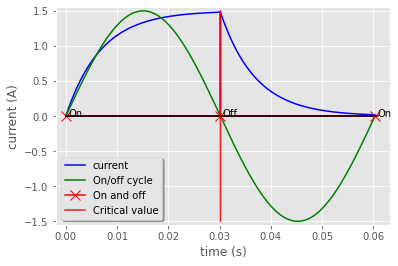

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

l = 0.0229      #Inductance (H)
r = 3.34        #Resistance (Ohm)
v = 5           #Voltage (V) DC
i = v/r         #Peak current (A)
tau = l/r       #Tau time constant
a = tau * 5   #critical time value at which current is switched (switching occurs every a seconds)

t = np.linspace(0,2*a,2000) #Time vector

#1st on-cycle current

def initialCurrent():
    current = []
    for i in t:
        if i <= a:
            current.append((v/r)*(1-np.exp((-r/l)*i)))          #I(t) = v/r*[1-exp((-r/l)*t)]
        else:
            current.append(0)
    return np.array(current)

#Plot Icurrent
Icurrent = initialCurrent()
plt.plot(t,Icurrent,label='current',color='blue')

#1st off-cycle current

def laterCurrent():
    current = []
    for i in t:
        if i >= a:
            current.append(Icurrent[-1001]*np.exp((-r/l)*(i-a)))  #I(t) = Ir * exp((-r/l)*(t-t0))
        else:
            current.append(0)
    return np.array(current)

#Plot current after switch off
current_off = laterCurrent()
plt.plot(t,current_off,color='blue')


#Current on and off cycle: on and off at the zeros of the it function
f = 1/(2*a)                 #frequency f = 1/T
w = np.pi/a                 #w = 2pi * f
it = i*np.sin(w*t)
plt.plot(t,it,label='On/off cycle',color='green')

#Plot zeros (switching points)
zeros = np.array([0,a,2*a])
zeros_i = i*np.sin(w*zeros)
plt.plot(zeros,zeros_i,marker='x',markersize=10,label='On and off',color='red')
plt.annotate('On',xy=(zeros[0]+0.0005,zeros_i[0]))
plt.annotate('Off',xy=(zeros[1]+0.0005,zeros_i[1]))
plt.annotate('On',xy=(zeros[2]+0.0005,zeros_i[2]))

#Critical value plot
plt.plot((a,a+0.00001),(max(it),min(it)),'r',alpha=0.9,label='Critical value')

#Print some data
print('Inductance (H):','\t'+str(l))
print('Resistance (Ohm):','\t'+str(r))
print('DC voltage (V):','\t'+str(v))
print('Current (A):','\t\t'+str(i))
print('Tau:','\t\t\t'+str(tau))
print('Critical time (s):','\t'+str(a))
print('\n')
print('Switch frequency (Hz):','\t'+str(f))
print('w coefficient (2*pi*f)','\t'+str(w))

#Plot settings

#x axis line
plt.plot((0,2*a+0.0005),(0,0),'k',alpha=0.9,markersize=10)

#Axis labels
plt.xlabel('time (s)')
plt.ylabel('current (A)')

#Legend and limits
plt.legend(loc=3,fancybox=True,shadow=True)
plt.xlim(-0.002,2*a+0.003)
plt.ylim(min(it)-0.05,max(it)+0.05)

plt.show()